# **Applied Machine Learning Assignment 2 **

# **`Import Libraries for all Assignemnt`**

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.datasets import make_classification, make_circles
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
import timeit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings(action='ignore')


# **[Part 1 : Naive Bayes](https://)**

In [2]:
def getConfusionMatrix(model,X_test,y_test,title):
    """plot the confusion matrix of a model
    Input: model, X_test, y_test
    Output: print the confusion matrix
    """
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=model.classes_)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.title(title)
    plt.show()

In [3]:
def plotData(features, labels, cls, class_names,axis_labels):
    """plot the data for OVA Model
    Input: features, labels, cls, class_names
    Output: plot the data of the model
    """
    colors = ['r', 'b', 'g','']
    markers = ['o', '*', '+']
    for class_index in range(len(cls)):
        plt.xlabel(axis_labels[0])
        plt.ylabel(axis_labels[1])  
        plt.scatter(features[labels == cls[class_index],0], 
                    features[labels == cls[class_index],1], 
                    c=colors[class_index], marker=markers[class_index], 
                    label=class_names[cls[class_index]])
    Title = "Dataset with {n} classes".format(n=int(len(cls)))
    plt.title(Title)
    plt.legend()

In [4]:
def plotRegions(model, X):
    """plot the regions of the training model  
    Input: model, X
    Output: plot the regions
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    XX, YY = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    z = model.predict(np.c_[XX.ravel(), YY.ravel()])
    ZZ = z.reshape(XX.shape)
    plt.contourf(XX, YY, ZZ, alpha=0.2)

In [5]:
def plotDataAndBoundries(X,y,Cls,classNames,model,axis_labels):
    """plot the data and boundries 
    Input: X,y,Cls,classNames,model
    Output: plot the data and boundries
    """
    plotData(X, y,Cls,classNames,axis_labels)
    plotRegions(model,X)
    plt.legend(loc="upper left")
    plt.show()

In [6]:
#load wine dataset from sklean
data = load_wine()
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [7]:
#extract X from dataset convert X to dataframe
X = pd.DataFrame(data=data.data, columns=data.feature_names)
X.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


In [8]:
#extract y from dataset
y=data.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [9]:
# checking the number of missing data
X.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [10]:
#split data into training and testing with 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [11]:
best2Features = SelectKBest(chi2, k=2).fit_transform(X, y)
#best 2 features are color_intensity, proline

In [12]:
# Feature Scaling 
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:

# Train Guassian Naive Model and predit 
nb= GaussianNB()
NBmodel=nb.fit(X_train,y_train)
ypred= NBmodel.predict(X_test)

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


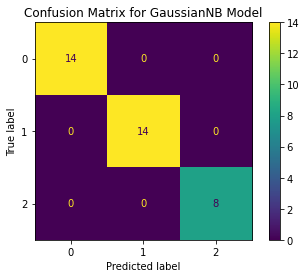

In [14]:
#plot confusion matrix 
getConfusionMatrix(NBmodel,X_test,y_test,"Confusion Matrix for {}".format("GaussianNB Model"))


In [15]:
#Classification Report for all Features
print('\nClassification Report for all Features')
print(classification_report(y_test, ypred,  target_names =data.target_names))


Classification Report for all Features
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



[[13  1  0]
 [ 0 12  2]
 [ 1  2  5]]


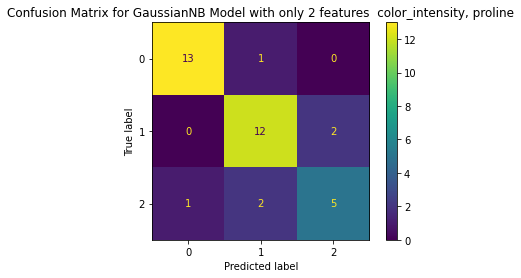


Classification Report for GaussianNB Model with only 2 features  color_intensity, proline
              precision    recall  f1-score   support

     class_0       0.93      0.93      0.93        14
     class_1       0.80      0.86      0.83        14
     class_2       0.71      0.62      0.67         8

    accuracy                           0.83        36
   macro avg       0.81      0.80      0.81        36
weighted avg       0.83      0.83      0.83        36

Testing for classes 0 , 1 , 2 with only 2 features color_intensity, proline


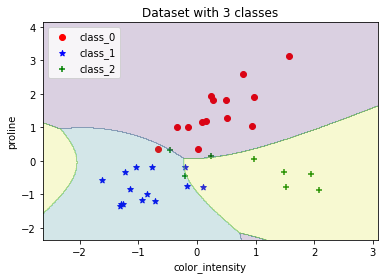

In [16]:
# retraining Gaussian Naive Bayes with only 2 features
nb= GaussianNB()
NBmodelWith2Features=nb.fit(X_train[:,[-4,-1]],y_train)
ypred_with2Features=NBmodelWith2Features.predict(X_test[:,[-4,-1]])
getConfusionMatrix(NBmodelWith2Features,X_test[:,[-4,-1]],y_test,"Confusion Matrix for {}".format("GaussianNB Model with only 2 features  color_intensity, proline"))
print('\nClassification Report for GaussianNB Model with only 2 features  color_intensity, proline')
print(classification_report(y_test, ypred_with2Features,  target_names =data.target_names))
print("Testing for classes 0 , 1 , 2 with only 2 features color_intensity, proline")
plotDataAndBoundries(X_test[:,[-4,-1]],y_test,[0,1,2],{0:'class_0', 1:'class_1',2:'class_2'} ,NBmodelWith2Features,['color_intensity', 'proline'])

# **Part 2 : KNN**

In [17]:
dataset2 =pd.read_csv('car_evaluation.csv',header=None)
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
dataset2.columns = col_names
dataset2.head(20)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [18]:
dataset2.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


# **get X -> features , y-> label**

In [19]:
X = dataset2.drop(['class'], axis=1)
y = dataset2['class']

In [20]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [21]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: class, Length: 1728, dtype: object

### print the  unique value in each coulmn

In [22]:
print(f"the unique values in buying    column :{pd.Series.unique(X.buying)}")
print(f"the unique values in maint     column :{pd.Series.unique(X.maint)}")
print(f"the unique values in doors     column :{pd.Series.unique(X.doors)}")
print(f"the unique values in persons   column :{pd.Series.unique(X.persons)}")
print(f"the unique values in lug_boot  column :{pd.Series.unique(X.lug_boot)}")
print(f"the unique values in safety    column :{pd.Series.unique(X.safety)}")
print("========================================================================")
print(f"the unique values in the target label :{pd.Series.unique(y)}")

the unique values in buying    column :['vhigh' 'high' 'med' 'low']
the unique values in maint     column :['vhigh' 'high' 'med' 'low']
the unique values in doors     column :['2' '3' '4' '5more']
the unique values in persons   column :['2' '4' 'more']
the unique values in lug_boot  column :['small' 'med' 'big']
the unique values in safety    column :['low' 'med' 'high']
the unique values in the target label :['unacc' 'acc' 'vgood' 'good']


# **data preprocessing**


In [23]:
# checking the number of missing data
dataset2.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

# **2. a) shuffle the data and get training, validation, testing set**

In [24]:
X_train, X_test_validation, y_train, y_test_validation = train_test_split( X, y, test_size=0.4209, random_state=42,shuffle=True)
X_test, X_validation, y_test, y_validation = train_test_split( X_test_validation,y_test_validation, test_size=0.412, random_state=42,shuffle=True)

In [25]:
print("length of X_train     :",len(X_train))
print("length of y_train     :",len(y_train))
print("length of X_validation:",len(X_validation))
print("length of y_validation:",len(y_validation))
print("length of X_test      :",len(X_test))
print("length of y_test      :",len(y_test))

length of X_train     : 1000
length of y_train     : 1000
length of X_validation: 300
length of y_validation: 300
length of X_test      : 428
length of y_test      : 428


# **2. b)use ordinal encoder and label encoder to transfer categorical data to numeric data**

In [26]:
!pip install category_encoders

### Encoding the training data 

In [27]:
print("before encoding")
print(f"the unique values in buying    column :{pd.Series.unique(X_train.buying)}")
print(f"the unique values in maint     column :{pd.Series.unique(X_train.maint)}")
print(f"the unique values in doors     column :{pd.Series.unique(X_train.doors)}")
print(f"the unique values in persons   column :{pd.Series.unique(X_train.persons)}")
print(f"the unique values in lug_boot  column :{pd.Series.unique(X_train.lug_boot)}")
print(f"the unique values in safety    column :{pd.Series.unique(X_train.safety)}")
print("========================================================================")
print("before encoding:")
print("buying        :",X_train.buying.dtypes)
print("maint         :",X_train.maint.dtypes)
print("doors         :",X_train.doors.dtypes)
print("persons       :",X_train.persons.dtypes) 
print("lug_boot      :",X_train.lug_boot.dtypes) 
print("safety        :",X_train.safety.dtypes)

before encoding
the unique values in buying    column :['high' 'vhigh' 'low' 'med']
the unique values in maint     column :['low' 'med' 'vhigh' 'high']
the unique values in doors     column :['3' '5more' '4' '2']
the unique values in persons   column :['more' '2' '4']
the unique values in lug_boot  column :['big' 'med' 'small']
the unique values in safety    column :['high' 'low' 'med']
before encoding:
buying        : object
maint         : object
doors         : object
persons       : object
lug_boot      : object
safety        : object


In [28]:
# encode the features using ordinalEncoder
import category_encoders as ce 

encoder_1= ce.OrdinalEncoder(cols=['buying'],return_df=True,mapping=[{'col':'buying','mapping':{'vhigh':4 ,'high':3 ,'med':2 ,'low':1}}])
X_train.buying= encoder_1.fit_transform(X_train.buying)

encoder_2= ce.OrdinalEncoder(cols=['maint'],return_df=True,mapping=[{'col':'maint','mapping':{'vhigh':4 ,'high':3 ,'med':2 ,'low':1}}])
X_train.maint= encoder_2.fit_transform(X_train.maint)

encoder_3= ce.OrdinalEncoder(cols=['doors'],return_df=True,mapping=[{'col':'doors','mapping':{'2':2,'3':3,'4':4,'5more':5}}])
X_train.doors= encoder_3.fit_transform(X_train.doors)

encoder_4= ce.OrdinalEncoder(cols=['persons'],return_df=True,mapping=[{'col':'persons','mapping':{'2':2,'4':4,'more':6}}])
X_train.persons= encoder_4.fit_transform(X_train.persons)

encoder_5= ce.OrdinalEncoder(cols=['lug_boot'],return_df=True,mapping=[{'col':'lug_boot','mapping':{'small':1 ,'med':2 ,'big':3}}])
X_train.lug_boot= encoder_5.fit_transform(X_train.lug_boot)

encoder_6= ce.OrdinalEncoder(cols=['safety'],return_df=True,mapping=[{'col':'safety','mapping':{'low':1,'med':2,'high':3}}])
X_train.safety = encoder_6.fit_transform(X_train.safety)


In [29]:
# encode the target label using label encoder 
labelencoder_y = LabelEncoder()
labelencoder_y.fit(y_train)
y_train  = labelencoder_y.transform(y_train)

In [30]:
print("after encoding")
print(f"the unique values in buying    column :{pd.Series.unique(X_train.buying)}")
print(f"the unique values in maint     column :{pd.Series.unique(X_train.maint)}")
print(f"the unique values in doors     column :{pd.Series.unique(X_train.doors)}")
print(f"the unique values in persons   column :{pd.Series.unique(X_train.persons)}")
print(f"the unique values in lug_boot  column :{pd.Series.unique(X_train.lug_boot)}")
print(f"the unique values in safety    column :{pd.Series.unique(X_train.safety)}")
print("========================================================================")
print("after encoding:")
print("buying        :",X_train.buying.dtypes)
print("maint         :",X_train.maint.dtypes)
print("doors         :",X_train.doors.dtypes)
print("persons       :",X_train.persons.dtypes) 
print("lug_boot      :",X_train.lug_boot.dtypes) 
print("safety        :",X_train.safety.dtypes)

after encoding
the unique values in buying    column :[3 4 1 2]
the unique values in maint     column :[1 2 4 3]
the unique values in doors     column :[3 5 4 2]
the unique values in persons   column :[6 2 4]
the unique values in lug_boot  column :[3 2 1]
the unique values in safety    column :[3 1 2]
after encoding:
buying        : int32
maint         : int32
doors         : int32
persons       : int32
lug_boot      : int32
safety        : int32


### Encoding the validation data 

In [31]:
X_validation.buying= encoder_1.transform(X_validation.buying)
X_validation.maint= encoder_2.transform(X_validation.maint)
X_validation.doors= encoder_3.transform(X_validation.doors)
X_validation.persons= encoder_4.transform(X_validation.persons)
X_validation.lug_boot= encoder_5.transform(X_validation.lug_boot)
X_validation.safety = encoder_6.transform(X_validation.safety)

In [32]:
# encode the target label using label encoder 
y_validation  = labelencoder_y.transform(y_validation)

### Encoding the testing data 

In [33]:
X_test.buying= encoder_1.transform(X_test.buying)
X_test.maint= encoder_2.transform(X_test.maint)
X_test.doors= encoder_3.transform(X_test.doors)
X_test.persons= encoder_4.transform(X_test.persons)
X_test.lug_boot= encoder_5.transform(X_test.lug_boot)
X_test.safety = encoder_6.transform(X_test.safety)

In [34]:
# encode the target label using label encoder 
y_test  = labelencoder_y.transform(y_test)

# **2. c)use different number of training samples to show the impact of number of training sample**

In [35]:
def Evaluate(model,X_train,y_train,X_validation,y_validation,X_test,y_test):
    
    start = timeit.default_timer()
    model.fit(X_train, y_train)
    stop = timeit.default_timer()
    train_time=(stop-start) # training time
    
    # test the accuracy on the validation set
    validation_score=model.score(X_validation, y_validation)*100
    
    start2 = timeit.default_timer()
    validation_prediction=model.predict(X_validation)
    stop2 = timeit.default_timer()
    prediction_time_validation=(stop2-start2) # prediction time based on the validation set 
    
    # test the accuracy on the test set
    test_score=model.score(X_test, y_test)*100
    
    start3 = timeit.default_timer()
    test_prediction=model.predict(X_test)
    stop3 = timeit.default_timer()
    prediction_time_testing=(stop3-start3) # prediction time based on the testing set
    
    print("===============================================")
    print("training time                         :",train_time)
    print("prediction time on validation set     :",prediction_time_validation)
    print("prediction time on testing set        :",prediction_time_testing)
    print('validation accuracy :',validation_score)
    print('testing accuracy    :',test_score)
    print("===============================================")
#     ConfusionMatrixDisplay.from_estimator(model,X_validation, y_validation)  
#     plt.show()

    return train_time,prediction_time_validation,prediction_time_testing,validation_score,test_score

In [36]:
# Fitting K-NN 
from sklearn.neighbors import KNeighborsClassifier
def train_KNN_model(k,X_train,y_train,X_validation,y_validation,X_test,y_test):
    classifier = KNeighborsClassifier(n_neighbors = k,metric='minkowski',p = 2)
    train_time,prediction_time_validation,prediction_time_testing,validation_score,test_score=Evaluate(classifier,X_train,y_train,X_validation,y_validation,X_test,y_test)
    return train_time,prediction_time_validation,prediction_time_testing,validation_score,test_score

In [37]:
def train_with_percentage(k,data_limit,X_train,y_train,X_validation,y_validation,X_test,y_test):
    X_train = X_train.head(data_limit)
    y_train = y_train[0:data_limit]
    print(f"percentage of training data:{int(data_limit/10)}% , k value : {k}",)
    train_time,prediction_time_validation,prediction_time_testing,validation_score,test_score=train_KNN_model(k,X_train,y_train,X_validation,y_validation,X_test,y_test)
    return train_time,prediction_time_validation,prediction_time_testing,validation_score,test_score

In [38]:
training_percentages = [10,20,30,40,50,60,70,80,90,100]
validation_accuracy = []
testing_accuracy = []
training_times = []
prediction_validation_times = []
prediction_testing_times = []
for i in training_percentages:
    limit = i*10
    train_time,prediction_time_validation,prediction_time_testing,validation_score,test_score=train_with_percentage(2,limit,X_train,y_train,X_validation,y_validation,X_test,y_test)
    validation_accuracy.append(validation_score)
    testing_accuracy.append(test_score)
    training_times.append(train_time)
    prediction_validation_times.append(prediction_time_validation)
    prediction_testing_times.append(prediction_time_testing)

percentage of training data:10% , k value : 2
training time                         : 0.0017833999999989913
prediction time on validation set     : 0.0075494000000002615
prediction time on testing set        : 0.00998739999999998
validation accuracy : 78.66666666666666
testing accuracy    : 76.16822429906543
percentage of training data:20% , k value : 2
training time                         : 0.0012459000000006881
prediction time on validation set     : 0.0073048
prediction time on testing set        : 0.010347100000000609
validation accuracy : 81.0
testing accuracy    : 77.33644859813083
percentage of training data:30% , k value : 2
training time                         : 0.0014780999999999267
prediction time on validation set     : 0.007657299999999978
prediction time on testing set        : 0.00988879999999881
validation accuracy : 85.66666666666667
testing accuracy    : 79.43925233644859
percentage of training data:40% , k value : 2
training time                         : 0.0014526

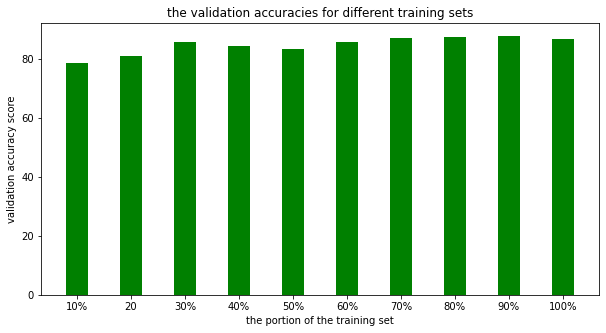

In [39]:
fig = plt.figure(figsize = (10, 5))
plt.bar(["10%","20","30%","40%","50%","60%","70%","80%","90%","100%"], validation_accuracy, color ='green',width = 0.4)
 
plt.xlabel("the portion of the training set")
plt.ylabel("validation accuracy score")
plt.title("the validation accuracies for different training sets")
plt.show()

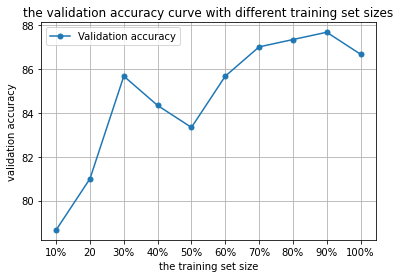

In [40]:
plt.plot(["10%","20","30%","40%","50%","60%","70%","80%","90%","100%"], validation_accuracy,marker='o', markersize=5, label='validation Accuracy')
plt.xlabel('the training set size')
plt.ylabel('validation accuracy')
plt.title("the validation accuracy curve with different training set sizes")
plt.legend(['Validation accuracy'])
plt.grid()
plt.show()

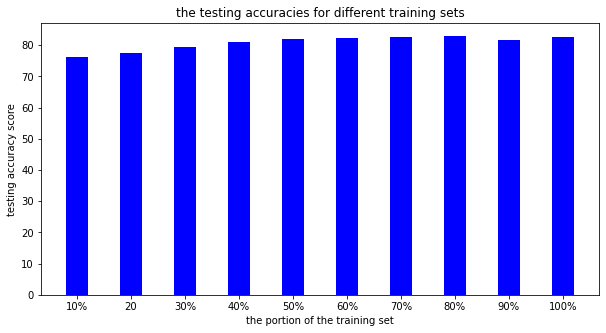

In [41]:
# creating the bar plot
fig = plt.figure(figsize = (10, 5))
plt.bar(["10%","20","30%","40%","50%","60%","70%","80%","90%","100%"], testing_accuracy, color ='blue',width = 0.4)
 
plt.xlabel("the portion of the training set")
plt.ylabel("testing accuracy score")
plt.title("the testing accuracies for different training sets")
plt.show()

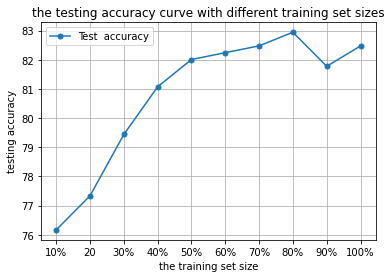

In [42]:
plt.plot(["10%","20","30%","40%","50%","60%","70%","80%","90%","100%"], testing_accuracy,marker='o', markersize=5, label='testing Accuracy')
plt.xlabel('the training set size')
plt.ylabel('testing accuracy')
plt.title("the testing accuracy curve with different training set sizes")
plt.legend(['Test  accuracy'])
plt.grid()
plt.show()

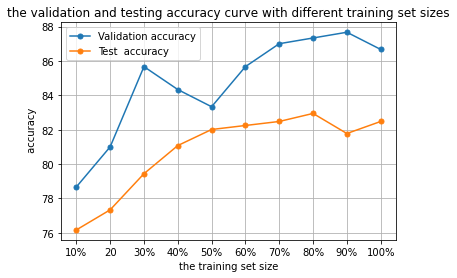

In [43]:
plt.plot(["10%","20","30%","40%","50%","60%","70%","80%","90%","100%"], validation_accuracy,marker='o', markersize=5, label='validation Accuracy')
plt.plot(["10%","20","30%","40%","50%","60%","70%","80%","90%","100%"], testing_accuracy,marker='o', markersize=5, label='testing Accuracy')
plt.xlabel('the training set size')
plt.ylabel(' accuracy')
plt.title("the validation and testing accuracy curve with different training set sizes")
plt.legend(['Validation accuracy', 'Test  accuracy'])
plt.grid()
plt.show()

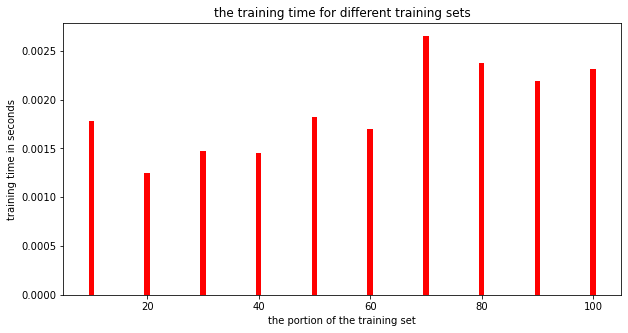

In [44]:
# creating the bar plot
fig = plt.figure(figsize = (10, 5))
plt.bar(training_percentages, training_times, color ='red',width = 1)
 
plt.xlabel("the portion of the training set")
plt.ylabel("training time in seconds")
plt.title("the training time for different training sets")
plt.show()

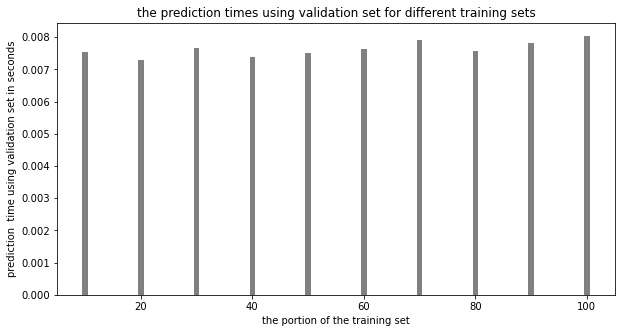

In [45]:
# creating the bar plot
fig = plt.figure(figsize = (10, 5))
plt.bar(training_percentages, prediction_validation_times, color ='gray',width = 1)
 
plt.xlabel("the portion of the training set")
plt.ylabel("prediction  time using validation set in seconds")
plt.title("the prediction times using validation set for different training sets")
plt.show()

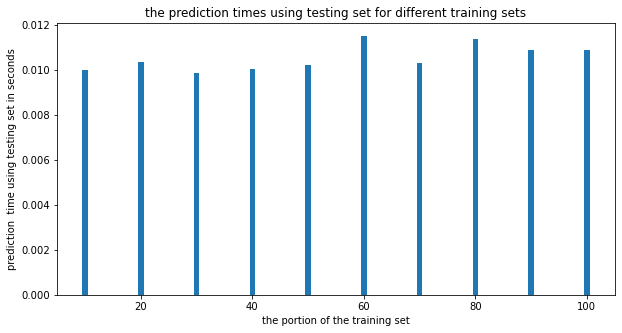

In [46]:
# creating the bar plot
fig = plt.figure(figsize = (10, 5))
plt.bar(training_percentages, prediction_testing_times,width = 1)
 
plt.xlabel("the portion of the training set")
plt.ylabel("prediction  time using testing set in seconds")
plt.title("the prediction times using testing set for different training sets")
plt.show()

### 2. d) use 100% of the training set and k varies from 1 to 10 

In [47]:
validation_accuracy2 = []
testing_accuracy2 = []
training_times2 = []
prediction_validation_times2 = []
prediction_testing_times2 = []
k_values = [1,2,3,4,5,6,7,8,9,10]
for i in k_values:
    train_time,prediction_time_validation,prediction_time_testing,validation_score,test_score=train_with_percentage(i,1000,X_train,y_train,X_validation,y_validation,X_test,y_test)
    validation_accuracy2.append(validation_score)
    testing_accuracy2.append(test_score)
    training_times2.append(train_time)
    prediction_validation_times2.append(prediction_time_validation)
    prediction_testing_times2.append(prediction_time_testing)

percentage of training data:100% , k value : 1
training time                         : 0.004073100000001162
prediction time on validation set     : 0.008939800000000275
prediction time on testing set        : 0.012218700000000027
validation accuracy : 87.33333333333333
testing accuracy    : 85.2803738317757
percentage of training data:100% , k value : 2
training time                         : 0.002844300000001354
prediction time on validation set     : 0.009099199999999641
prediction time on testing set        : 0.01154050000000062
validation accuracy : 86.66666666666667
testing accuracy    : 82.4766355140187
percentage of training data:100% , k value : 3
training time                         : 0.004294399999999143
prediction time on validation set     : 0.00863799999999948
prediction time on testing set        : 0.013118499999999145
validation accuracy : 90.66666666666666
testing accuracy    : 93.22429906542055
percentage of training data:100% , k value : 4
training time              

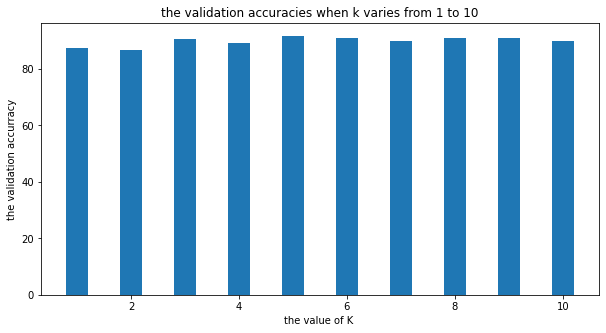

In [48]:
# creating the bar plot
fig = plt.figure(figsize = (10, 5))
plt.bar(k_values, validation_accuracy2,width = 0.4)
 
plt.xlabel("the value of K ")
plt.ylabel("the validation accurracy")
plt.title("the validation accuracies when k varies from 1 to 10")
plt.show()

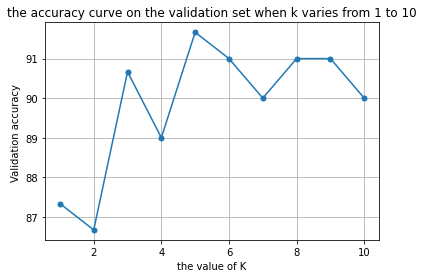

In [49]:
plt.plot(k_values, validation_accuracy2,marker='o', markersize=5, label='validation Accuracy')
plt.xlabel('the value of K')
plt.ylabel('Validation accuracy ')
plt.title("the accuracy curve on the validation set when k varies from 1 to 10")
plt.grid()
plt.show()

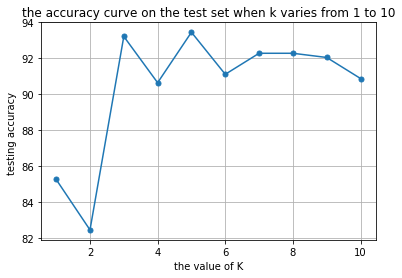

In [50]:
plt.plot(k_values,testing_accuracy2,marker='o', markersize=5, label='testing Accuracy')
plt.xlabel('the value of K')
plt.ylabel('testing accuracy ')
plt.title("the accuracy curve on the test set when k varies from 1 to 10")
plt.grid()
plt.show()

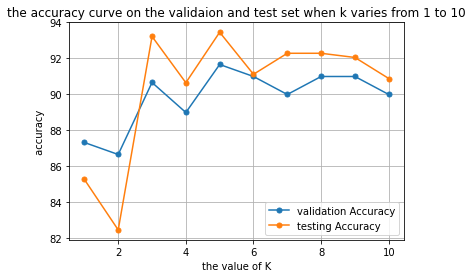

In [51]:
plt.plot(k_values,validation_accuracy2,marker='o', markersize=5, label='validation Accuracy')
plt.plot(k_values,testing_accuracy2,marker='o', markersize=5, label='testing Accuracy')
plt.xlabel('the value of K')
plt.ylabel(' accuracy ')
plt.title("the accuracy curve on the validaion and test set when k varies from 1 to 10")
plt.legend(['validation Accuracy','testing Accuracy'])
plt.grid()
plt.show()

**### 2.e ) Analysis the training time when use different number of training samples.**

In [52]:
k_values2 =[2,2,10,10]
percent =[10,100,10,100]
validation_accuracy3 = []
testing_accuracy3 = []
training_times3 = []
prediction_validation_times3 = []
prediction_testing_times3 = []

for i in range(4):
    limit = percent[i]*10
    k = k_values2[i]
    train_time,prediction_time_validation,prediction_time_testing,validation_score,test_score=train_with_percentage(k,limit,X_train,y_train,X_validation,y_validation,X_test,y_test)
    validation_accuracy3.append(validation_score)
    testing_accuracy3.append(test_score)
    training_times3.append(train_time)
    prediction_validation_times3.append(prediction_time_validation)
    prediction_testing_times3.append(prediction_time_testing)

percentage of training data:10% , k value : 2
training time                         : 0.0018440000000001788
prediction time on validation set     : 0.007827899999998778
prediction time on testing set        : 0.010304599999999553
validation accuracy : 78.66666666666666
testing accuracy    : 76.16822429906543
percentage of training data:100% , k value : 2
training time                         : 0.003386299999998954
prediction time on validation set     : 0.008397099999999824
prediction time on testing set        : 0.011071199999999948
validation accuracy : 86.66666666666667
testing accuracy    : 82.4766355140187
percentage of training data:10% , k value : 10
training time                         : 0.001124200000001352
prediction time on validation set     : 0.007633799999998914
prediction time on testing set        : 0.010182399999999703
validation accuracy : 80.0
testing accuracy    : 76.4018691588785
percentage of training data:100% , k value : 10
training time                        

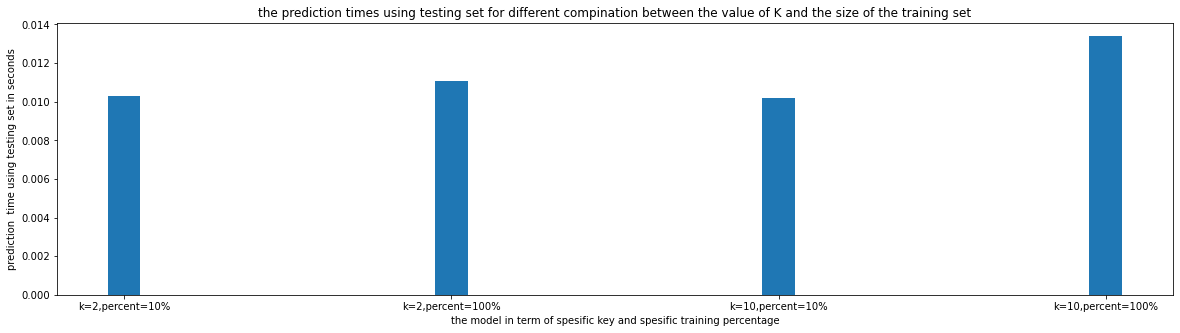

In [53]:
# creating the bar plot
fig = plt.figure(figsize = (20, 5))
labels = ["k=2,percent=10%","k=2,percent=100%","k=10,percent=10%","k=10,percent=100%"]

plt.bar(labels, prediction_testing_times3,width = 0.1)
 
plt.xlabel("the model in term of spesific key and spesific training percentage")
plt.ylabel("prediction  time using testing set in seconds")
plt.title("the prediction times using testing set for different compination between the value of K and the size of the training set")
plt.show()

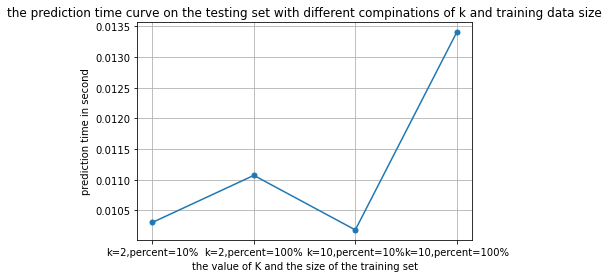

In [54]:
plt.plot(["k=2,percent=10%","k=2,percent=100%","k=10,percent=10%","k=10,percent=100%"], prediction_testing_times3,marker='o', markersize=5, label='validation Accuracy')
plt.xlabel('the value of K and the size of the training set')
plt.ylabel('prediction time in second')
plt.title("the prediction time curve on the testing set with different compinations of k and training data size")
plt.grid()
plt.show()

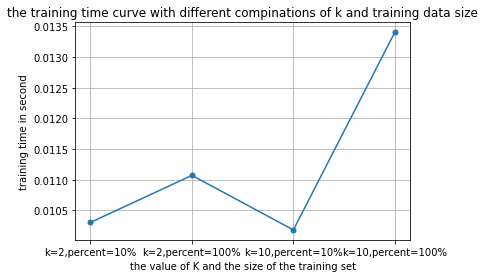

In [55]:
plt.plot(["k=2,percent=10%","k=2,percent=100%","k=10,percent=10%","k=10,percent=100%"], prediction_testing_times3,marker='o', markersize=5, label='validation Accuracy')
plt.xlabel('the value of K and the size of the training set')
plt.ylabel('training time in second')
plt.title("the training time curve with different compinations of k and training data size")
plt.grid()
plt.show()

# **References**

1. https://docs.python.org/3/library/timeit.html#timeit.Timer.timeit
2. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
4. https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set